<a href="https://colab.research.google.com/github/sarahammoudaa/bati_vite/blob/master/Analysis_of_the_impact_of_external_factors_such_as_traffic_and_weather_on_delivery_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install pandas matplotlib seaborn

In [11]:
import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LinearRegression  # For building the model
from sklearn.metrics import mean_absolute_error  # For evaluating the model


In [6]:
df = pd.read_csv('/content/dynamic_supply_chain_logistics_dataset.csv')
df.head()


,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [19]:
# Check for missing values
df.isnull().sum()

# Select only numeric columns for median imputation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# fill missing values in non-numeric columns with the most frequent value (mode):
for col in df.select_dtypes(exclude=np.number).columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])


# Exploratory Data Analysis (EDA)
 Now, let’s understand how traffic congestion and weather severity affect delivery time deviation.


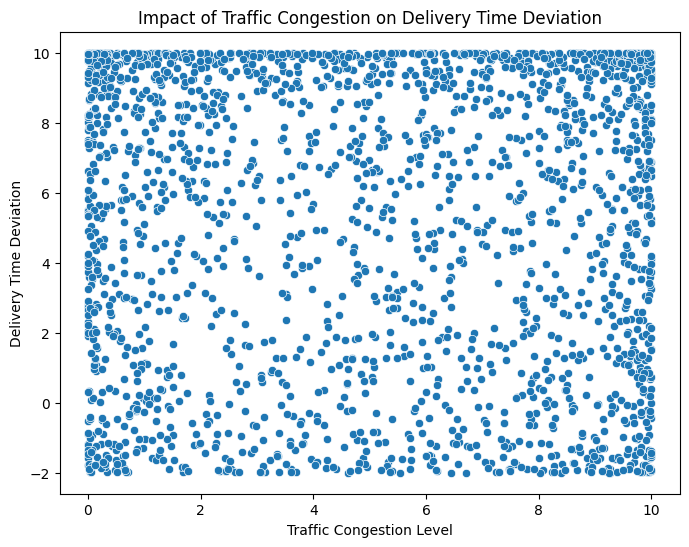

In [25]:
# Scatter plot to check correlation between traffic congestion and delivery time deviation
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['traffic_congestion_level'], y=df['delivery_time_deviation'])
plt.title('Impact of Traffic Congestion on Delivery Time Deviation')
plt.xlabel('Traffic Congestion Level')
plt.ylabel('Delivery Time Deviation')
plt.show()


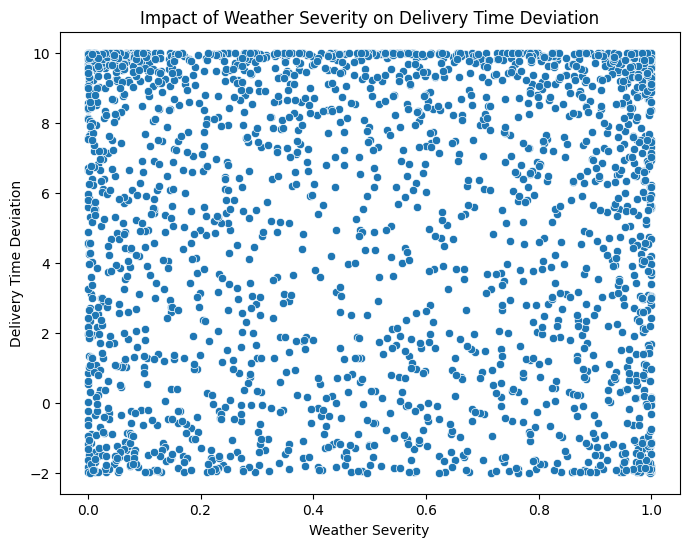

In [24]:
# Scatter plot to check correlation between weather severity and delivery time deviation
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['weather_condition_severity'], y=df['delivery_time_deviation'])
plt.title('Impact of Weather Severity on Delivery Time Deviation')
plt.xlabel('Weather Severity')
plt.ylabel('Delivery Time Deviation')
plt.show()


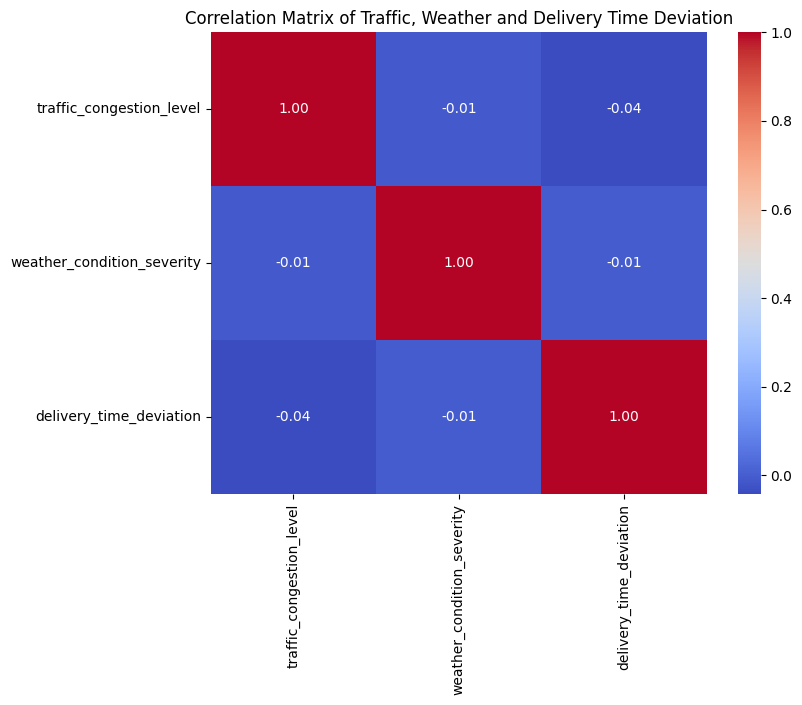

In [29]:
# Calculate correlations
correlation_matrix = df[['traffic_congestion_level', 'weather_condition_severity', 'delivery_time_deviation']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Traffic, Weather and Delivery Time Deviation')
plt.show()
